<a href="https://colab.research.google.com/github/maddiejane25/Project-1/blob/dev/JK_Alzheimers_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORT LIBRARIES**

In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

# **IMPORT AND READ DATA**

In [4]:
# Upload the csv file
from google.colab import files
uploaded = files.upload()

Saving alzheimers_disease_data.csv to alzheimers_disease_data.csv


In [5]:
# Import the csv file
alzheimer_df = pd.read_csv('alzheimers_disease_data.csv')
alzheimer_df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [6]:
# Get info
alzheimer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [7]:
# Search for missing or duplicate data
print('Null:', alzheimer_df.isnull().sum().sum())
print('Duplicate:', alzheimer_df.duplicated().sum())

Null: 0
Duplicate: 0


# **EXPLORATORY DATA ANALYSIS**

In [8]:
# Drop columns?
alzheimer_df.drop((['DoctorInCharge']), axis = 1, inplace = True)

In [9]:
# Change Binary Columns from 0/1 to No/Yes
alzheimer_df[['Smoking', 'FamilyHistoryAlzheimers','CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'MemoryComplaints', 'BehavioralProblems', 'Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness', 'Diagnosis']] = alzheimer_df[['Smoking', 'FamilyHistoryAlzheimers','CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'MemoryComplaints', 'BehavioralProblems', 'Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness', 'Diagnosis']].replace({0: 'No', 1: 'Yes'})

# Change Gender column
alzheimer_df['Gender'] = alzheimer_df['Gender'].replace({0: 'Male', 1: 'Female'})

# Change Ethnicity column
alzheimer_df['Ethnicity'] = alzheimer_df['Ethnicity'].replace({0: 'Caucasian', 1: 'African American', 2: 'Asian', 3: 'Other'})

# Change EducationLevel column
alzheimer_df['EducationLevel'] = alzheimer_df['EducationLevel'].replace({0: 'None', 1: 'High School', 2: 'Bachelors', 3: 'Higher'})

# Display Changes
alzheimer_df.head(10)

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,4751,73,Male,Caucasian,Bachelors,22.927749,No,13.297218,6.327112,1.347214,...,6.518877,No,No,1.725883,No,No,No,Yes,No,No
1,4752,89,Male,Caucasian,None,26.827681,No,4.542524,7.619885,0.518767,...,7.118696,No,No,2.592424,No,No,No,No,Yes,No
2,4753,73,Male,Other,High School,17.795882,No,19.555085,7.844988,1.826335,...,5.895077,No,No,7.119548,No,Yes,No,Yes,No,No
3,4754,74,Female,Caucasian,High School,33.800817,Yes,12.209266,8.428001,7.435604,...,8.965106,No,Yes,6.481226,No,No,No,No,No,No
4,4755,89,Male,Caucasian,None,20.716974,No,18.454356,6.310461,0.795498,...,6.045039,No,No,0.014691,No,No,Yes,Yes,No,No
5,4756,86,Female,African American,High School,30.626886,No,4.140144,0.211062,1.584922,...,5.510144,No,No,9.015686,Yes,No,No,No,No,No
6,4757,68,Male,Other,Bachelors,38.387622,Yes,0.646047,9.257695,5.897388,...,6.062124,No,No,9.236328,No,No,No,No,Yes,No
7,4758,75,Male,Caucasian,High School,18.776009,No,13.723826,4.649451,8.341903,...,3.401374,No,No,4.517248,Yes,No,No,No,Yes,Yes
8,4759,72,Female,African American,None,27.833188,No,12.167848,1.531360,6.736882,...,7.396061,No,Yes,0.756232,No,No,Yes,No,No,No
9,4760,87,Male,Caucasian,None,35.456302,Yes,16.028688,6.440773,8.086019,...,1.148904,No,Yes,4.554394,No,No,No,No,No,No


In [10]:
# How many individuals from the data set have been diagnosed with Alzheimers?
print("Individuals in the dataset who were diagnosed with Alzheimer\'s:", alzheimer_df[alzheimer_df['Diagnosis'] == 'Yes'].shape[0])

Individuals in the dataset who were diagnosed with Alzheimer's: 760


# **DEMOGRAPHICS**
* Age
* Gender
* Ethnicity
* Education Level





In [11]:
# Make a smaller dataset for Demographics
demographics = alzheimer_df[['Diagnosis','Age', 'Gender', 'Ethnicity', 'EducationLevel']]
demographics.head()

,Diagnosis,Age,Gender,Ethnicity,EducationLevel
0,No,73,Male,Caucasian,Bachelors
1,No,89,Male,Caucasian,None
2,No,73,Male,Other,High School
3,No,74,Female,Caucasian,High School
4,No,89,Male,Caucasian,None


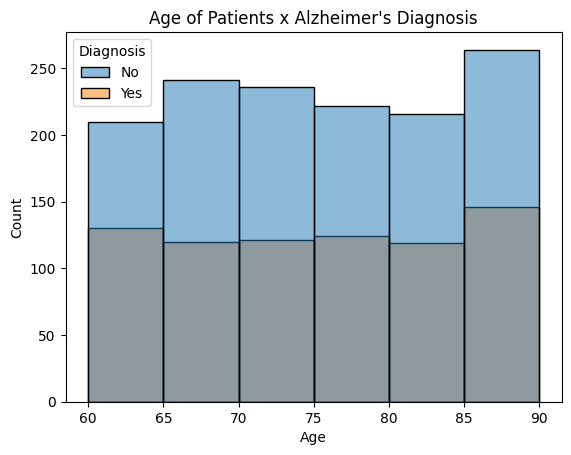

In [12]:
# Age Distribution by Diagnosis
sns.histplot(data=alzheimer_df, x='Age', hue='Diagnosis', binwidth=5)
plt.title('Age of Patients x Alzheimer\'s Diagnosis')
plt.xlabel('Age')
plt.ylabel('Count')

# Display the plot
plt.show()


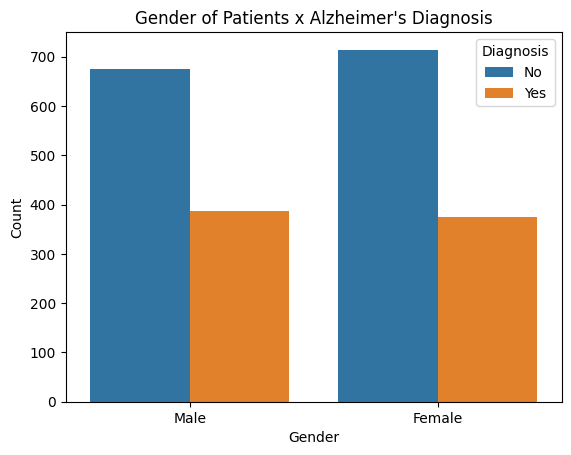

In [13]:
# Gender Distribution by Diagnosis
sns.countplot(data=alzheimer_df, x='Gender', hue='Diagnosis')
plt.title('Gender of Patients x Alzheimer\'s Diagnosis')
plt.xlabel('Gender')
plt.ylabel('Count')

# Display the plot
plt.show()

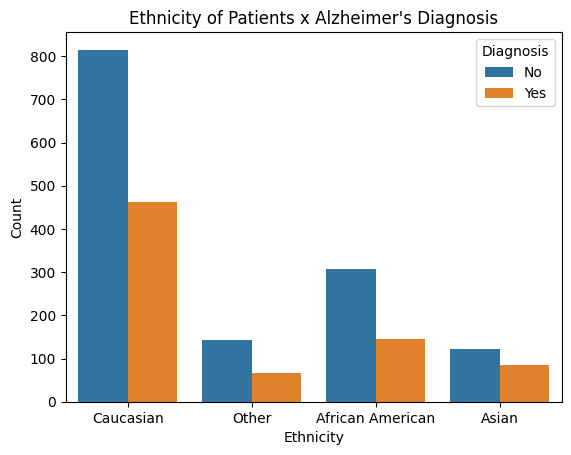

In [14]:
# Ethnicity Distribution by Diagnosis
sns.countplot(data=alzheimer_df, x='Ethnicity', hue='Diagnosis')
plt.title('Ethnicity of Patients x Alzheimer\'s Diagnosis')
plt.xlabel('Ethnicity')
plt.ylabel('Count')

# Display the plot
plt.show()

# **LIFESTYLE**
* BMI
* Smoking
* Alcohol Consumption
* Pyhsical Activity
* Diet Quality
* Sleep Quality

In [15]:
lifestyle = alzheimer_df[['BMI','Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'Diagnosis']]
lifestyle.head()

,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,Diagnosis
0,22.927749,No,13.297218,6.327112,1.347214,9.025679,No
1,26.827681,No,4.542524,7.619885,0.518767,7.151293,No
2,17.795882,No,19.555085,7.844988,1.826335,9.673574,No
3,33.800817,Yes,12.209266,8.428001,7.435604,8.392554,No
4,20.716974,No,18.454356,6.310461,0.795498,5.597238,No


In [17]:
lifestyle_bmi = lifestyle.groupby('Diagnosis')['BMI'].mean()
lifestyle_bmi

,BMI
Diagnosis,
No,27.515092
Yes,27.912670


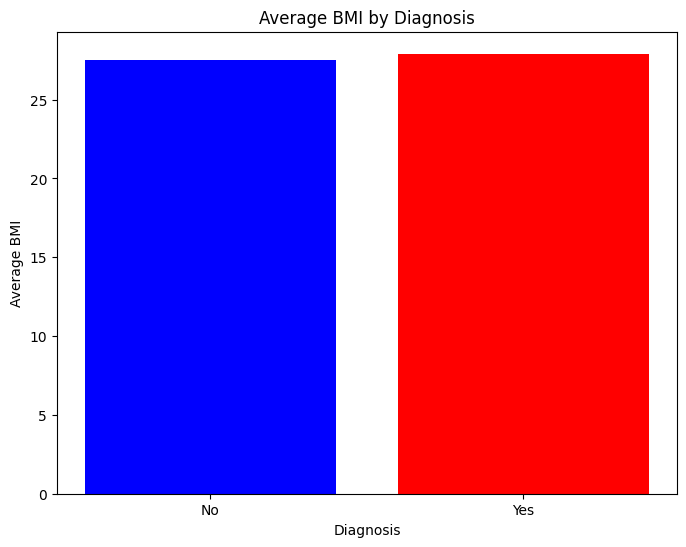

In [23]:
# Create a bar graph for BMI
plt.figure(figsize=(8, 6))
plt.bar(lifestyle_bmi.index, lifestyle_bmi.values, color=('blue', 'red'))
plt.xlabel('Diagnosis')
plt.ylabel('Average BMI')
plt.title('Average BMI by Diagnosis')

# Plot the results
plt.show()


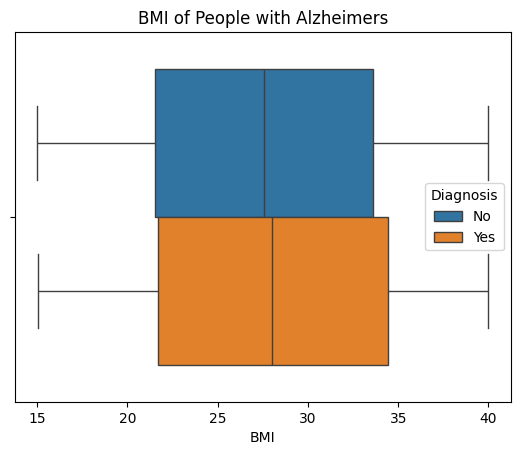

In [24]:
# Distribution of BMI levels

sns.boxplot(data=alzheimer_df, x='BMI', hue='Diagnosis')
plt.title('BMI of People with Alzheimers')
plt.xlabel('BMI')

# Plot the results
plt.show()


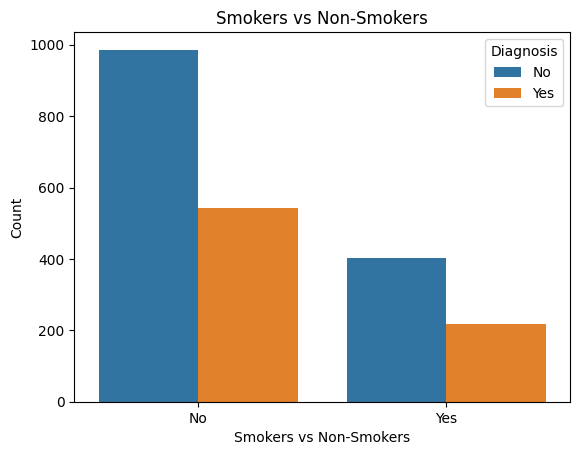

In [25]:
# Smoking by Diagnosis
sns.countplot(data=alzheimer_df, x='Smoking', hue='Diagnosis')
plt.title('Smokers vs Non-Smokers')
plt.xlabel('Smokers vs Non-Smokers')
plt.ylabel('Count')

# Display the plot
plt.show()

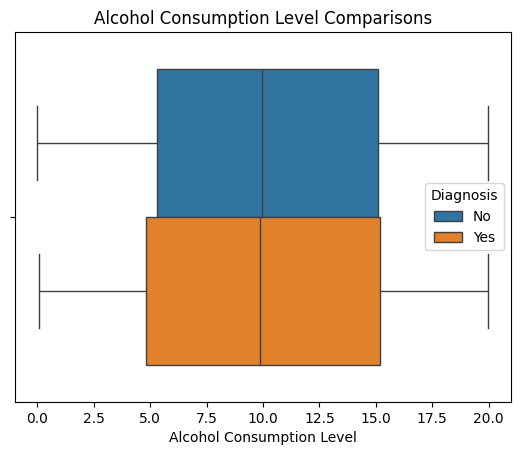

In [26]:
# Alcohol Consumption Distribution by Diagnosis
sns.boxplot(data=alzheimer_df, x='AlcoholConsumption', hue='Diagnosis')
plt.title('Alcohol Consumption Level Comparisons')
plt.xlabel('Alcohol Consumption Level')

# Display the plot
plt.show()

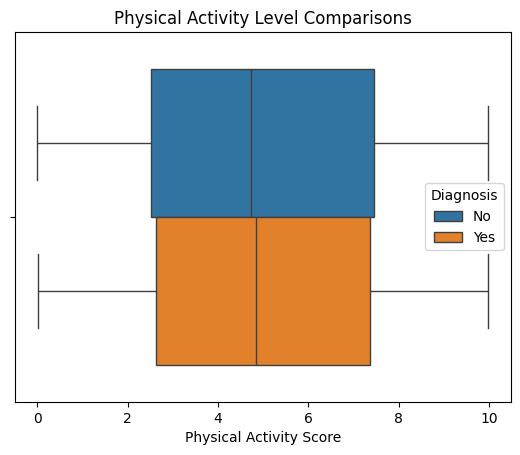

In [27]:
# Physical ActivityDistribution by Diagnosis
sns.boxplot(data=alzheimer_df, x='PhysicalActivity', hue='Diagnosis')
plt.title('Physical Activity Level Comparisons')
plt.xlabel('Physical Activity Score')

# Display the plot
plt.show()

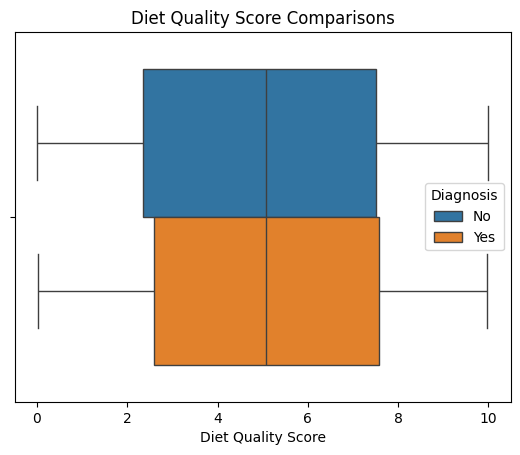

In [28]:
# Diet Quality Distribution by Diagnosis
sns.boxplot(data=alzheimer_df, x='DietQuality', hue='Diagnosis')
plt.title('Diet Quality Score Comparisons')
plt.xlabel('Diet Quality Score')

# Display the plot
plt.show()

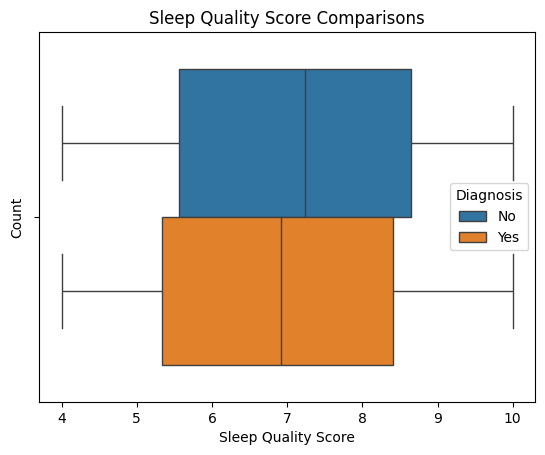

In [29]:
# Sleep Quality Distribution by Diagnosis
sns.boxplot(data=alzheimer_df, x='SleepQuality', hue='Diagnosis')
plt.title('Sleep Quality Score Comparisons')
plt.xlabel('Sleep Quality Score')
plt.ylabel('Count')

# Display the plot
plt.show()

# **MEDICAL HISTORY**
* Family History Alzheimers
* Cardiovascular Disease
* Diabetes
* Depression
* Head Injury
* Hypertension

In [ ]:
# Make a smaller dataset for medical_history
medical_history = alzheimer_df[['Diagnosis',
                                'BMI',
                                'FamilyHistoryAlzheimers',
                                'CardiovascularDisease',
                                'Diabetes',
                                'Depression',
                                'HeadInjury',
                                'Hypertension']]
medical_history.head()

# **CLINICAL MEASUREMENTS**
* Systolic BP
* Diastolic BP
* Cholesterol Total
* Cholesterol LDL
* Cholesterol HDL
* Cholesterol Triglycerides


In [ ]:
# Plot a countplot of Family History vs Diagnosis
sns.countplot(x='FamilyHistoryAlzheimers', hue='Diagnosis', data=medical_history)

# **ASSESSMENTS**
* MMSE
* Functional Assessment
* Memory complaints
* Behavioral Problems
* ADL

# **SYMPTOMS**
* Confusion
* Disorientation
* Personality Changes
* Difficulty Completing Tasks
* Forgetfulness
